# Problem Statement

![](doi_moi.png)

## Input
- n: int = Số cây cần hạ $(1 ≤ n ≤ 10^{18})$
- a: int = Số cây đội 1 hạ mỗi ngày $(1 ≤ a ≤ 10^9)$
- b: int = Số cây đội 2 hạ mỗi ngày $(1 ≤ a ≤ 10^9)$
- k: int = Ngày đội 1 nghỉ $(2 ≤ k ≤ 10^{18})$
- m: int = Ngày đội 2 nghỉ $(2 ≤ m ≤ 10^{18})$

## Output
- x: int = Số ngày tối thiểu để cả 2 đội hạ toàn bộ cây trong thành phố

# Decomposition

Mục tiêu: tìm công thức tính số cây chặt được của cả 2 đội sau x ngày

Giả sử:
- $a$ = 2
- $b$ = 3
- $k$ = 3
- $m$ = 4
- $t_1(x)$ = số cây đội 1 hạ sau x ngày khi k = 3
- $t_2(x)$ = số cây đội 2 hạ sau x ngày khi m = 4
- $t_1^{'}(x)$ = số cây đội 1 hạ sau x ngày khi k = 0
- $t_2^{'}(x)$ = số cây đội 1 hạ sau x ngày khi m = 0

Nhận xét:
- Nếu đội 1 làm việc liên tục (k = 0) thì $t_1^{'}(x) = ax$
- Nếu đội 2 làm việc liên tục (m = 0) thì $t_2^{'}(x) = bx$

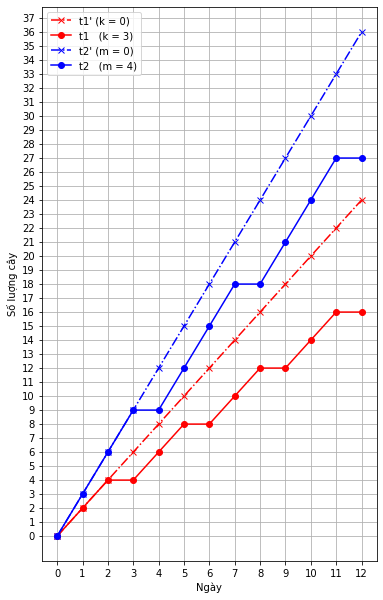

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6*1.7))
a = 2
b = 3
day = np.linspace(0, 12, 13)

t1_ = [a * x for x in day]
plt.plot(day, t1_, 'rx-.', label='t1\' (k = 0)')

t1 = [0, 2, 4, 4, 6, 8, 8, 10, 12, 12, 14, 16, 16]
plt.plot(day, t1,  'ro-',  label='t1   (k = 3)')

t2_ = [b * x for x in day]
plt.plot(day, t2_, 'bx-.',  label='t2\' (m = 0)')

t2 = [0, 3, 6, 9, 9, 12, 15, 18, 18, 21, 24, 27, 27]
plt.plot(day, t2,  'bo-',  label='t2   (m = 4)')

plt.grid(True)
plt.xticks(ticks=day)
plt.yticks(ticks=[x for x in range(38)])
plt.xlabel('Ngày')
plt.ylabel('Số luợng cây')
plt.legend()


Nhận xét 
- Đội 1:
    - Ngày 0 -> 2: $t_1^{'} - t_1 = 0$
    - Ngày 3 -> 5: $t_1^{'} - t_1 = 2$
    - Ngày 6 -> 8: $t_1^{'} - t_1 = 4$
- Đội 2:
    - Ngày 0 -> 3: $t_2^{'} - t_2 = 0$
    - Ngày 4 -> 7: $t_2^{'} - t_2 = 3$
    - Ngày 8 -> 11: $t_2^{'} - t_2 = 6$
    
Từ nhận xét trên ta rút ra được công thức:
$$
\begin{cases}
    t_1^{'}(x) - t_1(x) = a\left\lfloor\frac{x}{k}\right\rfloor \\
    t_2^{'}(x) - t_2(x) = b\left\lfloor\frac{x}{m}\right\rfloor
\end{cases}
$$
Mà:
$$
\begin{cases}
    t_1^{'}(x) = ax \\
    t_2^{'}(x) = bx
\end{cases}
$$
$$
\begin{aligned}
    & \implies 
        \begin{cases}
            t_1^{'}(x) - t_1(x) = ax - t_1(x) \\
            t_2^{'}(x) - t_2(x) = bx - t_2(x)
        \end{cases} \\
    & \implies 
        \begin{cases}
            ax - t_1(x) = a\left\lfloor\frac{x}{k}\right\rfloor \\
            bx - t_2(x) = b\left\lfloor\frac{x}{m}\right\rfloor
        \end{cases} \\
    & \implies 
        \begin{cases}
            t_1(x) = ax - a\left\lfloor\frac{x}{k}\right\rfloor \\
            t_2(x) = bx - b\left\lfloor\frac{x}{m}\right\rfloor
        \end{cases} \\
    & \implies 
        \begin{cases}
            t_1(x) = a(x - \left\lfloor\frac{x}{k}\right\rfloor) \\
            t_2(x) = b(x - \left\lfloor\frac{x}{m}\right\rfloor)
        \end{cases}
\end{aligned}
$$

Vậy số cây đội 1 và đội 2 hạ sau x ngày là:

$$
t(x) = t_1(x) + t_2(x) = a(x - \left\lfloor\frac{x}{k}\right\rfloor) 
                         + b(x - \left\lfloor\frac{x}{m}\right\rfloor)
$$

# Abstraction

Tìm x nhỏ nhất sao cho t(x) >= n (số lượng cây cần hạ)

# Pattern recognition

1. Brute-force search
2. Binary search

# Algorithm design

## Brute-force search

**Pseudocode**

1. Khởi tạo x = 1
2. Tính t(x) (số cây cả hai đội chặt sau x ngày) sử dụng công thức đã trình bày phần trên
    - Nếu t(x) >= n thì dừng vòng lặp và trả về x
    - Ngược lại thì tăng x thêm 1 và lặp lại bước 2
    
**Time complexity**: $O(n)$


## Binary Search

**Ý tưởng**:

Do n lớn $(n <= 10^{18})$ và hàm t(x) là hàm tăng nên chúng ta có thể dùng binary search để tìm x nhanh hơn.

- Để dùng binary search thì ta cần xác định miền giá trị \[left, right\] chứa x.

- Để xác định miền giá trị này thì ta có thể làm như sau:
    - B1: khởi tạo left = right = 1
    - B2: nếu t(right) >= n thì trả về khoảng \[left, right\]
        - ngược lại: gán left = right, gán right = right * 2 và quay lại B2

Sau khi có miền giá trị đó thì ta áp dụng binary search như mình thường, tuy nhiên cần **lưu ý**:
- Nếu tìm được t(x) = n thì chưa vội return x mà vẫn thực hiện tìm tiếp vì có trường hợp t(x-1) = t(x) = n thì phải return x-1

**Time complexity**: $O(\log n)$

In [6]:
import math


def advanced_binary_search(n, left, right):
    day = 1


    while left <= right:
        mid = (left + right) // 2
        if total_tree_at(mid) < n:
            left = mid + 1
        else:
            day = mid
            right = mid - 1
    return day


def total_tree_at(x):
    return a * (x - x // k) + b * (x - x // m)



a, k, b, m, n = map(int, input().split())

left = right = 1

while total_tree_at(right) < n:
    left = right
    right *= 2

day = advanced_binary_search(n, left, right)

print(day)

7
